In [1]:
import os
import pandas as pd
import numpy as np

[Data : nyra_2019_complete.csv]

In [2]:
completefile_path = 'nyra_2019_complete/'
data = pd.read_csv(f"{completefile_path}/nyra_2019_complete.csv")

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.columns

Index(['track_id', 'race_date', 'race_number', 'program_number',
       'trakus_index', 'latitude', 'longitude', 'distance_id', 'course_type',
       'track_condition', 'run_up_distance', 'race_type', 'purse', 'post_time',
       'weight_carried', 'jockey', 'odds'],
      dtype='object')

In [3]:
data['odds'] = data['odds']/100

[across jockies : Checking the data content]

In [4]:
data['jockey'].value_counts().reset_index().rename(columns = {'index':'jockeys','jockey':'data'})

,jockeys,data
0,Manuel Franco,444024
1,Dylan Davis,381018
2,Jose Lezcano,344802
3,Junior Alvarado,299324
4,Irad Ortiz Jr.,282044
...,...,...
173,Jose Angel Garcia,280
174,Jose F. Rojas,269
175,Luca Panici,258
176,Kevin Gomez,256


[Check: jockey=='Manuel Franco' & track_id == 'AQU' & race_date == '2019-04-19']
> A visual to look into the deatils of the 'Manuel Franco' across track_id & race_date

In [5]:
data.loc[(data['jockey'] == 'Manuel Franco') & (data['track_id'] == 'AQU') & (data['race_date'] == '2019-04-19')]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
297,AQU,2019-04-19,7,2,1,40.669548,-73.829641,600,O,FM,58,CLM,62000,442,120,Manuel Franco,3.35
298,AQU,2019-04-19,7,2,2,40.669553,-73.829638,600,O,FM,58,CLM,62000,442,120,Manuel Franco,3.35
299,AQU,2019-04-19,7,2,3,40.669559,-73.829635,600,O,FM,58,CLM,62000,442,120,Manuel Franco,3.35
300,AQU,2019-04-19,7,2,4,40.669567,-73.829632,600,O,FM,58,CLM,62000,442,120,Manuel Franco,3.35
301,AQU,2019-04-19,7,2,5,40.669578,-73.829627,600,O,FM,58,CLM,62000,442,120,Manuel Franco,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277220,AQU,2019-04-19,8,3,48,40.672137,-73.827972,600,D,FT,48,SOC,55000,516,118,Manuel Franco,1.50
3277221,AQU,2019-04-19,8,3,49,40.672182,-73.827950,600,D,FT,48,SOC,55000,516,118,Manuel Franco,1.50
3277222,AQU,2019-04-19,8,3,50,40.672227,-73.827929,600,D,FT,48,SOC,55000,516,118,Manuel Franco,1.50
3277223,AQU,2019-04-19,8,3,51,40.672273,-73.827907,600,D,FT,48,SOC,55000,516,118,Manuel Franco,1.50


[NOTE]
For a given Horse - Track ID - Race Date - Track Number
> Distance ID , Course Type, Track Condition , Runner Up Distance , Race Type , Purse , Post Time , Weight Carried doesnot change.
> The odds of winning also remains the same.
> The dimension of the data is increased because of the GPS data that is being updated very 0.25 seconds. 
>> It is clearly evident if we closely look at the above data for a single race track

[One hot encoding based on the condition of the race track]
> This will come in handly when we summarise the data across Jockey-Race Date

In [6]:
data.track_condition.unique()

array(['GD ', 'FM ', 'FT ', 'SY ', 'MY ', 'YL ', 'SF '], dtype=object)

In [5]:
tracks = list(data.track_condition.unique())
for track in tracks:
    col_name = 'track_condition_'+track
    data[col_name] = np.where(data['track_condition'] == track,1,0)
    print(f"track condition :{track}")

track condition :GD 
track condition :FM 
track condition :FT 
track condition :SY 
track condition :MY 
track condition :YL 
track condition :SF 


[Transformation : Shifting data to Jockey- Race Date Level]

In [6]:
mdata = data.groupby(['jockey','race_date']).agg(track = pd.NamedAgg('track_id','unique'),
                                                 nrace_number = pd.NamedAgg('race_number','nunique'),
                                                 nprogram_number = pd.NamedAgg('program_number','nunique'),
                                                 ncourse_type = pd.NamedAgg('course_type','nunique'),
                                                 ntrack_condition = pd.NamedAgg('track_condition','nunique'),
                                                 approxsteps_GD = pd.NamedAgg('track_condition_GD ','sum'),
                                                 approxsteps_FM = pd.NamedAgg('track_condition_FM ','sum'),
                                                 approxsteps_FT = pd.NamedAgg('track_condition_FT ','sum'),
                                                 approxsteps_SY = pd.NamedAgg('track_condition_SY ','sum'),
                                                 approxsteps_MY = pd.NamedAgg('track_condition_MY ','sum'),
                                                 approxsteps_YL = pd.NamedAgg('track_condition_YL ','sum'),
                                                 approxsteps_SF = pd.NamedAgg('track_condition_SF ','sum'),
                                                 min_distance_feet = pd.NamedAgg('run_up_distance','min'),
                                                 max_distance_feet = pd.NamedAgg('run_up_distance','max'),
                                                 nrace_type = pd.NamedAgg('race_type','nunique'),
                                                 min_purse = pd.NamedAgg('purse','min'),
                                                 max_purse = pd.NamedAgg('purse','max'),
                                                 min_weight = pd.NamedAgg('weight_carried','min'),
                                                 max_weight = pd.NamedAgg('weight_carried','max')).reset_index()
mdata.head(5)

,jockey,race_date,track,nrace_number,nprogram_number,ncourse_type,ntrack_condition,approxsteps_GD,approxsteps_FM,approxsteps_FT,...,approxsteps_MY,approxsteps_YL,approxsteps_SF,min_distance_feet,max_distance_feet,nrace_type,min_purse,max_purse,min_weight,max_weight
0,Abner Adorno,2019-02-01,[AQU],1,1,1,1,0,0,296,...,0,0,0,48,48,1,41000,41000,123,123
1,Abner Adorno,2019-08-29,[SAR],1,1,1,1,0,397,0,...,0,0,0,90,90,1,100000,100000,122,122
2,Abner Adorno,2019-09-18,[BEL],1,1,1,1,0,390,0,...,0,0,0,140,140,1,62000,62000,119,119
3,Adam Beschizza,2019-05-03,[BEL],2,2,2,2,0,0,399,...,0,314,0,45,96,1,41000,41000,118,118
4,Adam Beschizza,2019-05-04,[BEL],6,4,3,2,0,0,0,...,0,0,994,44,175,4,33000,200000,117,124


[Kinematics based Study]
> Leveraging the GPS information of the Jockies that is captured during the race. 
>> A study of the jockey's movement & velocity for any given Track & Race ID [A key level is created to extract the relevance at this level on Jockey Name + track ID + race_number]

In [7]:
gpsdata = data[['jockey','track_id','race_number','race_date','run_up_distance','latitude', 'longitude']]
gpsdata['jockey_trackid'] = gpsdata['jockey'] + '_' +gpsdata['track_id']+ '_' + gpsdata['race_number'].astype(str)
gpsdata

C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/1358375375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpsdata['jockey_trackid'] = gpsdata['jockey'] + '_' +gpsdata['track_id']+ '_' + gpsdata['race_number'].astype(str)


,jockey,track_id,race_number,race_date,run_up_distance,latitude,longitude,jockey_trackid
0,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672902,-73.827607,Andre Shivnarine Worrie_AQU_9
1,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672946,-73.827587,Andre Shivnarine Worrie_AQU_9
2,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672990,-73.827568,Andre Shivnarine Worrie_AQU_9
3,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672510,-73.827781,Andre Shivnarine Worrie_AQU_9
4,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672553,-73.827762,Andre Shivnarine Worrie_AQU_9
...,...,...,...,...,...,...,...,...
5228425,Joel Rosario,AQU,9,2019-11-23,72,40.672363,-73.830853,Joel Rosario_AQU_9
5228426,Joel Rosario,AQU,9,2019-11-23,72,40.672321,-73.830873,Joel Rosario_AQU_9
5228427,Joel Rosario,AQU,9,2019-11-23,72,40.672281,-73.830893,Joel Rosario_AQU_9
5228428,Joel Rosario,AQU,9,2019-11-23,72,40.672240,-73.830913,Joel Rosario_AQU_9


[Transformation][From GPS Coordinates to Euclidean Coordinates]
> Alert !! [Brute Logic] 
>> This is a hard coded logic to view the transformation procedure at it's most raw form.  

In [8]:
list_tracks_jockeys = list(gpsdata.jockey_trackid.unique())
trans_gps = pd.DataFrame(columns = {'jockey_trackid','transformed_lat','transformed_long','recorded_time'})
for jockey in list_tracks_jockeys:
    datum = gpsdata.loc[gpsdata['jockey_trackid'] == jockey][['jockey_trackid','latitude', 'longitude']]
    R = 6371
    lat,lon = np.deg2rad(datum['latitude']),np.deg2rad(datum['longitude'])
    datum['transformed_lat'] = R * np.cos(lat) * np.cos(lon)
    datum['transformed_long'] = R * np.cos(lat) * np.sin(lon)
    datum['recorded_time'] = 0.25
    
    trans_gps = pd.concat([trans_gps,datum],axis = 0)
    print(f'Jockey :{jockey}')

Jockey :Andre Shivnarine Worrie_AQU_9
Jockey :Manuel Franco_AQU_7
Jockey :Dylan Davis_BEL_10
Jockey :Manuel Franco_BEL_6
Jockey :Irad Ortiz Jr._SAR_3
Jockey :Samuel Jimenez_AQU_4
Jockey :Heman K. Harkie_AQU_3
Jockey :Joey R. Martinez_AQU_6
Jockey :Joey R. Martinez_AQU_3
Jockey :Joey R. Martinez_AQU_2
Jockey :Joey R. Martinez_BEL_4
Jockey :Joey R. Martinez_BEL_8
Jockey :Rajiv Maragh_SAR_6
Jockey :Reylu Gutierrez_AQU_8
Jockey :Rajiv Maragh_AQU_9
Jockey :Dylan Davis_AQU_5
Jockey :Dylan Davis_BEL_3
Jockey :Jose L. Ortiz_SAR_2
Jockey :Silvestre Gonzalez_AQU_2
Jockey :Irad Ortiz Jr._BEL_4
Jockey :Junior Alvarado_BEL_3
Jockey :Gerard Galligan_SAR_1
Jockey :Jack Doyle_SAR_1
Jockey :Victor R. Carrasco_AQU_8
Jockey :Benjamin Hernandez_BEL_9
Jockey :Rajiv Maragh_BEL_4
Jockey :Hector Rafael Diaz Jr._AQU_5
Jockey :Junior Alvarado_AQU_6
Jockey :Eric Cancel_AQU_4
Jockey :Oscar Gomez_AQU_3
Jockey :Junior Alvarado_AQU_8
Jockey :Junior Alvarado_AQU_4
Jockey :Junior Alvarado_AQU_3
Jockey :Jorge A. Vargas

Jockey :Jose Lezcano_AQU_2
Jockey :Jose Lezcano_AQU_1
Jockey :Dylan Davis_BEL_1
Jockey :Jose L. Ortiz_BEL_1
Jockey :Rafael Manuel Hernandez_AQU_7
Jockey :Benjamin Hernandez_BEL_3
Jockey :Jose L. Ortiz_AQU_5
Jockey :Jose L. Ortiz_BEL_4
Jockey :Jose L. Ortiz_BEL_10
Jockey :Kendrick Carmouche_AQU_7
Jockey :Kendrick Carmouche_BEL_10
Jockey :Jose L. Ortiz_AQU_7
Jockey :Luis Saez_BEL_8
Jockey :Joel Sone_AQU_9
Jockey :Joel Sone_AQU_6
Jockey :Rajiv Maragh_BEL_7
Jockey :Rajiv Maragh_BEL_6
Jockey :Eric Cancel_BEL_10
Jockey :Jose Lezcano_SAR_7
Jockey :Jose Baez_SAR_4
Jockey :Irad Ortiz Jr._BEL_3
Jockey :Javier Castellano_BEL_9
Jockey :Irad Ortiz Jr._SAR_9
Jockey :Benjamin Hernandez_SAR_7
Jockey :Benjamin Hernandez_SAR_4
Jockey :Benjamin Hernandez_SAR_9
Jockey :Benjamin Hernandez_SAR_12
Jockey :John R. Velazquez_SAR_4
Jockey :Benjamin Hernandez_SAR_5
Jockey :Benjamin Hernandez_BEL_8
Jockey :Benjamin Hernandez_BEL_5
Jockey :John R. Velazquez_BEL_5
Jockey :John R. Velazquez_SAR_12
Jockey :Kendrick C

Jockey :Edward Escobar_BEL_1
Jockey :Ricardo Santana Jr._BEL_7
Jockey :Flavien Prat_BEL_9
Jockey :Jose L. Ortiz_SAR_9
Jockey :Reylu Gutierrez_BEL_2
Jockey :Junior Alvarado_SAR_4
Jockey :Joe Bravo_AQU_7
Jockey :Kevin Gomez_SAR_9
Jockey :Dylan Davis_BEL_2
Jockey :Luis Saez_BEL_9
Jockey :Nazario Alvarado_BEL_6
Jockey :Heman K. Harkie_BEL_10
Jockey :Joel Rosario_BEL_2
Jockey :Kendrick Carmouche_SAR_8
Jockey :Dalton Brown_AQU_2
Jockey :Luis R. Reyes_SAR_11
Jockey :Declan Carroll_AQU_9
Jockey :Javier Castellano_BEL_3
Jockey :Heman K. Harkie_AQU_1
Jockey :Jose F. Rojas_SAR_2
Jockey :Ruben Silvera_AQU_8
Jockey :Junior Alvarado_AQU_9
Jockey :Katie Davis_AQU_5
Jockey :Jose L. Ortiz_AQU_4
Jockey :Julian Pimentel_BEL_7
Jockey :Joel Sone_AQU_3
Jockey :Benjamin Hernandez_SAR_10
Jockey :Pablo Fragoso_AQU_10
Jockey :Heman K. Harkie_AQU_9
Jockey :Tyler Gaffalione_SAR_8
Jockey :Edward Escobar_BEL_5
Jockey :Heman K. Harkie_BEL_2
Jockey :Joe Bravo_BEL_2
Jockey :Reylu Gutierrez_BEL_11
Jockey :Jose L. Ortiz

Jockey :Kendrick Carmouche_SAR_11
Jockey :Jose L. Ortiz_BEL_13
Jockey :Keivan Serrano_AQU_4
Jockey :Luis A. Rodriguez Castro_BEL_4
Jockey :Julien R. Leparoux_SAR_10
Jockey :Angel R. Rodriguez_AQU_7
Jockey :Tzeonn Chang_AQU_2
Jockey :Tzeonn Chang_BEL_9
Jockey :Tzeonn Chang_SAR_10
Jockey :Tzeonn Chang_SAR_1
Jockey :Ruben Silvera_AQU_6
Jockey :Oscar Gomez_AQU_9
Jockey :Gary Richards_BEL_2
Jockey :Luis A. Rodriguez Castro_BEL_5
Jockey :Julien R. Leparoux_BEL_6
Jockey :Harry Hernandez_BEL_5
Jockey :Julio Correa_AQU_8
Jockey :Tzeonn Chang_AQU_3
Jockey :Tzeonn Chang_BEL_2
Jockey :Tzeonn Chang_BEL_8
Jockey :Pablo Fragoso_BEL_10
Jockey :Chris Landeros_SAR_12
Jockey :John R. Velazquez_SAR_8
Jockey :Eric Cancel_SAR_5
Jockey :John R. Velazquez_AQU_9
Jockey :Georgina Sergeon_AQU_7
Jockey :Kendrick Carmouche_BEL_12
Jockey :Joel Rosario_BEL_5
Jockey :Florent Geroux_BEL_10
Jockey :Declan Carroll_AQU_7
Jockey :Kevin Carmona_AQU_1
Jockey :Samuel Camacho Jr._BEL_2
Jockey :Dylan Davis_BEL_12
Jockey :John 

Jockey :Javier Castellano_AQU_3
Jockey :Keivan Serrano_BEL_1
Jockey :David Cohen_AQU_2
Jockey :Jomar Garcia_AQU_1
Jockey :David Cohen_AQU_7
Jockey :Andrea C. Rodriguez_BEL_1
Jockey :Emmanuel Esquivel_AQU_7
Jockey :Tyler Gaffalione_SAR_13
Jockey :Tyler Conner_BEL_5
Jockey :Samuel Jimenez_BEL_11
Jockey :Luis Saez_BEL_13
Jockey :Trevor McCarthy_SAR_11
Jockey :Oscar Gomez_AQU_6
Jockey :Benjamin Hernandez_SAR_1
Jockey :Joe Bravo_AQU_3
Jockey :Keivan Serrano_AQU_1
Jockey :Irad Ortiz Jr._BEL_11
Jockey :Joel Rosario_SAR_11
Jockey :Daniel Centeno_BEL_10
Jockey :Reylu Gutierrez_BEL_5
Jockey :Irad Ortiz Jr._AQU_10
Jockey :Charlie Amaro_AQU_6
Jockey :Tzeonn Chang_BEL_11
Jockey :Samuel Jimenez_BEL_6
Jockey :Harry Hernandez_BEL_6
Jockey :Silvestre Gonzalez_AQU_6
Jockey :Christopher P. DeCarlo_AQU_3
Jockey :Jomar Torres_BEL_2
Jockey :Ricardo Santana Jr._SAR_11
Jockey :Tyler Gaffalione_AQU_6
Jockey :Reylu Gutierrez_BEL_7
Jockey :Gary Richards_BEL_7
Jockey :Luis Saez_BEL_12
Jockey :Heman K. Harkie_SAR_

Jockey :Michael J. Luzzi_SAR_8
Jockey :Tomas B. Mejia_AQU_10
Jockey :Ricardo Santana Jr._BEL_5
Jockey :Nik Juarez_AQU_10
Jockey :Leonardo Corujo_AQU_9
Jockey :Jose Antonio Gallego_SAR_3
Jockey :Talbert Howell_BEL_2
Jockey :Brian Joseph Hernandez Jr._SAR_9
Jockey :Mike E. Smith_SAR_6
Jockey :Leonardo Corujo_AQU_1
Jockey :Weston Hamilton_SAR_2
Jockey :Angel Cruz_BEL_8
Jockey :Carol Cedeno_AQU_9
Jockey :Jaime Rodriguez_SAR_5
Jockey :Trevor McCarthy_AQU_6
Jockey :Mario Gutierrez_BEL_7
Jockey :Paco Lopez_SAR_5
Jockey :Paco Lopez_SAR_7
Jockey :Flavien Prat_SAR_1
Jockey :Jorge A. Vargas Jr._BEL_7
Jockey :Keivan Serrano_AQU_9
Jockey :Abner Adorno_SAR_9
Jockey :Jaime Rodriguez_SAR_4
Jockey :Wilmer A. Garcia_BEL_2
Jockey :Jose Antonio Gallego_SAR_6
Jockey :Daisuke Fukumoto_AQU_9
Jockey :Leonardo Corujo_AQU_3
Jockey :Miyabi Muto_BEL_5
Jockey :Jevian Toledo_SAR_3
Jockey :Jose Antonio Gallego_SAR_7
Jockey :Daisuke Fukumoto_AQU_1
Jockey :Pablo Fragoso_BEL_8
Jockey :Mychel J. Sanchez_AQU_9
Jockey :Jo

[Dimentionality Check]
Post transformations, it is important to check if the dimensions are 
same for the transformed 'trans_gps' dataframe with the 'gpsdata' dataframe
> #rows of trans_gps = #rows of gpsdata.
>> [logic] The idea is to append the columns of the transformed GPS data(trans_gps) with the existing GPS data(gpsdata).

In [9]:
trans_gps.shape[0] == gpsdata.shape[0]

True

[Appending]
> Appending the above transformed GPS data(trans_gps) with the original GPS data(gpsdata).

In [10]:
gpsdata = pd.concat([gpsdata,trans_gps[['transformed_lat','transformed_long','recorded_time']]],axis = 1)
gpsdata

,jockey,track_id,race_number,race_date,run_up_distance,latitude,longitude,jockey_trackid,transformed_lat,transformed_long,recorded_time
0,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672902,-73.827607,Andre Shivnarine Worrie_AQU_9,1345.859772,-4640.824794,0.25
1,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672946,-73.827587,Andre Shivnarine Worrie_AQU_9,1345.860444,-4640.821259,0.25
2,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672990,-73.827568,Andre Shivnarine Worrie_AQU_9,1345.861108,-4640.817722,0.25
3,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672510,-73.827781,Andre Shivnarine Worrie_AQU_9,1345.853555,-4640.856171,0.25
4,Andre Shivnarine Worrie,AQU,9,2019-01-01,48,40.672553,-73.827762,Andre Shivnarine Worrie_AQU_9,1345.854266,-4640.852726,0.25
...,...,...,...,...,...,...,...,...,...,...,...
5228425,Joel Rosario,AQU,9,2019-11-23,72,40.672363,-73.830853,Joel Rosario_AQU_9,1345.607659,-4640.938573,0.25
5228426,Joel Rosario,AQU,9,2019-11-23,72,40.672321,-73.830873,Joel Rosario_AQU_9,1345.606874,-4640.941912,0.25
5228427,Joel Rosario,AQU,9,2019-11-23,72,40.672281,-73.830893,Joel Rosario_AQU_9,1345.606090,-4640.945205,0.25
5228428,Joel Rosario,AQU,9,2019-11-23,72,40.672240,-73.830913,Joel Rosario_AQU_9,1345.605312,-4640.948480,0.25


[Alternative Approach]
> The above logic is computationally intensive hence this is an alternative method to do the same and is much faster. 

In [8]:
def gps_conv(data: pd.DataFrame,R:int,col_latitude:str,col_longitude:str):
    
    lat,lon = np.deg2rad(data[col_latitude]),np.deg2rad(data[col_longitude])
    data['transformed_lat'] = R * np.cos(lat) * np.cos(lon)
    data['transformed_long'] = R * np.cos(lat) * np.sin(lon)
    data['recorded_time'] = 0.25
    
    return data
    
gpsdata = gps_conv(gpsdata,6371,'latitude','longitude')

C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/4087181218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_lat'] = R * np.cos(lat) * np.cos(lon)
C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/4087181218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_long'] = R * np.cos(lat) * np.sin(lon)
C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/4087181218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

[Jockey's Velocity]
> To study the change in velocity of the Jockey while he/she was racing.
>> It is purely done based on the GPS data that is being captured by the sensors after every 0.25 secs

In [9]:
gpsdata['diff_transformed_lat'] = gpsdata['transformed_lat'].diff(periods = 1).fillna(0)
gpsdata['diff_transformed_long'] = gpsdata['transformed_long'].diff(periods = 1).fillna(0)
gpsdata['dist'] = np.sqrt(gpsdata['diff_transformed_lat']**2+gpsdata['diff_transformed_long']**2)
gpsdata['velocity'] =  gpsdata['dist']/gpsdata['recorded_time']

C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/895588325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpsdata['diff_transformed_lat'] = gpsdata['transformed_lat'].diff(periods = 1).fillna(0)
C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/895588325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpsdata['diff_transformed_long'] = gpsdata['transformed_long'].diff(periods = 1).fillna(0)
C:\Users\Indranil\AppData\Local\Temp/ipykernel_10008/895588325.py:3: SettingWithCopyWarning: 
A value 

[Sample: 'Manuel Franco']

In [10]:
gpsdata.loc[gpsdata['jockey'] == 'Manuel Franco']

,jockey,track_id,race_number,race_date,run_up_distance,latitude,longitude,jockey_trackid,transformed_lat,transformed_long,recorded_time,diff_transformed_lat,diff_transformed_long,dist,velocity
297,Manuel Franco,AQU,7,2019-04-19,58,40.669548,-73.829641,Manuel Franco_AQU_7,1345.762704,-4641.105990,0.25,-0.112216,-0.380292,0.396503,1.586012
298,Manuel Franco,AQU,7,2019-04-19,58,40.669553,-73.829638,Manuel Franco_AQU_7,1345.762816,-4641.105562,0.25,0.000112,0.000428,0.000443,0.001771
299,Manuel Franco,AQU,7,2019-04-19,58,40.669559,-73.829635,Manuel Franco_AQU_7,1345.762916,-4641.105095,0.25,0.000100,0.000466,0.000477,0.001907
300,Manuel Franco,AQU,7,2019-04-19,58,40.669567,-73.829632,Manuel Franco_AQU_7,1345.763032,-4641.104437,0.25,0.000116,0.000659,0.000669,0.002676
301,Manuel Franco,AQU,7,2019-04-19,58,40.669578,-73.829627,Manuel Franco_AQU_7,1345.763183,-4641.103594,0.25,0.000151,0.000843,0.000856,0.003424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226779,Manuel Franco,BEL,7,2019-09-06,126,40.716244,-73.721927,Manuel Franco_BEL_7,1353.536497,-4635.318097,0.25,-0.005189,-0.000450,0.005208,0.020833
5226780,Manuel Franco,BEL,7,2019-09-06,126,40.716258,-73.721986,Manuel Franco_BEL_7,1353.531403,-4635.318536,0.25,-0.005094,-0.000439,0.005113,0.020452
5226781,Manuel Franco,BEL,7,2019-09-06,126,40.716272,-73.722046,Manuel Franco_BEL_7,1353.526277,-4635.318967,0.25,-0.005125,-0.000431,0.005143,0.020573
5226782,Manuel Franco,BEL,7,2019-09-06,126,40.716286,-73.722107,Manuel Franco_BEL_7,1353.521039,-4635.319401,0.25,-0.005238,-0.000434,0.005256,0.021024


[Summarise]
> Summarising an organic distribution of velocity for each of the Jockies. 
>> It contains minimum velocity , 25th,33rd,50th,75th & 95th quantile of a jockey for any given race date. In general, we have this information for all the Jockies in the data. 

In [11]:
kinestudy = gpsdata.groupby(['jockey','race_date']).agg(min_velocity = pd.NamedAgg('velocity','min'),
                                                        Qdot25_velocity = pd.NamedAgg('velocity',aggfunc = lambda x: np.quantile(x,q = 0.25)),
                                                        Qdot33_velocity = pd.NamedAgg('velocity',aggfunc = lambda x: np.quantile(x,q = 0.33)),
                                                        median_velocity = pd.NamedAgg('velocity','median'),
                                                        Qdot75_velocity = pd.NamedAgg('velocity',aggfunc = lambda x: np.quantile(x,q = 0.75)),
                                                        Qdot95_velocity = pd.NamedAgg('velocity',aggfunc = lambda x: np.quantile(x,q = 0.95))).reset_index()
kinestudy

,jockey,race_date,min_velocity,Qdot25_velocity,Qdot33_velocity,median_velocity,Qdot75_velocity,Qdot95_velocity
0,Abner Adorno,2019-02-01,0.001353,0.012209,0.012514,0.014269,0.018274,0.161648
1,Abner Adorno,2019-08-29,0.006650,0.016178,0.017048,0.017994,0.019290,0.200798
2,Abner Adorno,2019-09-18,0.003954,0.014847,0.015365,0.017615,0.020132,0.216816
3,Adam Beschizza,2019-05-03,0.000689,0.015309,0.015935,0.018105,0.020485,0.218635
4,Adam Beschizza,2019-05-04,0.000853,0.015185,0.015941,0.017284,0.020036,0.199443
...,...,...,...,...,...,...,...,...
4373,Wilmer A. Garcia,2019-10-10,0.004071,0.016628,0.017339,0.018261,0.020558,0.208075
4374,Wilmer A. Garcia,2019-10-16,0.007801,0.014529,0.015020,0.017770,0.020012,0.210801
4375,Wilmer A. Garcia,2019-10-19,0.004113,0.015462,0.015933,0.017056,0.019648,0.212501
4376,Wilmer A. Garcia,2019-12-12,0.007528,0.012597,0.013441,0.013443,0.018326,0.148994


[Data Integration]
> Integrating the organic growth for each of the Jockey's velocity with the rest of the data on a Jockey-Race Date level.   

In [12]:
masterdata = pd.merge(mdata,kinestudy,how = 'left',on = ['jockey','race_date'])
masterdata.shape[0] == mdata.shape[0]

True

[Data Integration] --> Integrating the odds in the above data for a given Jockey & Race Date

In [13]:
odds_isolation = data.groupby(['jockey','race_date']).agg(odds = pd.NamedAgg('odds','mean')).reset_index()
odds_isolation.shape[0] == masterdata.shape[0]

True

In [14]:
masterdata = pd.merge(masterdata,odds_isolation,how = 'left',on = ['jockey','race_date'])
masterdata.shape[0] == odds_isolation.shape[0]

True

[Check] The above 2 blocks of code indicate the odds integration & dimentionality check. 

[Sparcity Check]
> Checking the percentage of 0's in each of the features in the masterdata {The summarised data across Jockey-Race Date Level}

In [15]:
((masterdata.iloc[0:masterdata.shape[0],0:masterdata.shape[1]] == 0).sum()/masterdata.shape[0])*100

jockey                0.000000
race_date             0.000000
track                 0.000000
nrace_number          0.000000
nprogram_number       0.000000
ncourse_type          0.000000
ntrack_condition      0.000000
approxsteps_GD       79.716766
approxsteps_FM       63.522156
approxsteps_FT       32.800365
approxsteps_SY       88.533577
approxsteps_MY       94.540886
approxsteps_YL       96.116948
approxsteps_SF       99.680219
min_distance_feet     1.484696
max_distance_feet     1.484696
nrace_type            0.000000
min_purse             0.000000
max_purse             0.000000
min_weight            0.000000
max_weight            0.000000
min_velocity         11.534947
Qdot25_velocity       0.000000
Qdot33_velocity       0.000000
median_velocity       0.000000
Qdot75_velocity       0.000000
Qdot95_velocity       0.000000
odds                  0.000000
dtype: float64

[Visualization]
Let us take a peak inside the relationship of the features with the odds.

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns


[Figure 1]
> Minmum Purse Vs Odds (Level : Jockey- Race Date Level)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='min_purse', ylabel='odds'>

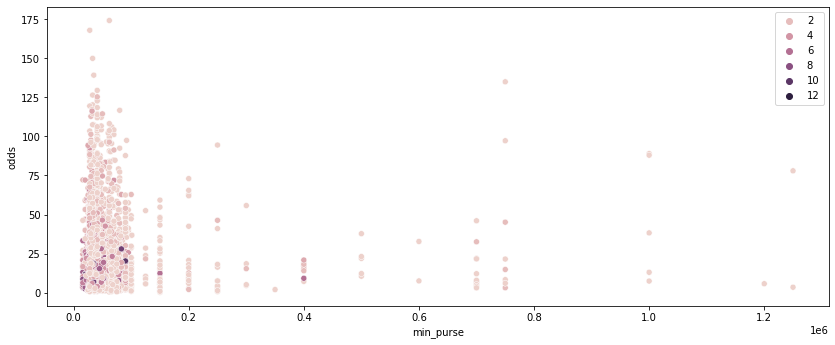

In [18]:
plt.legend(loc='lower right')
plt.rcParams["figure.figsize"] = [14.00, 5.50]
sns.scatterplot(x = 'min_purse',y = 'odds',hue = list(masterdata.nrace_number),data = masterdata,legend = True)

From figure 1, it is obvious that the odds are high near the lower value of Minimal Purse compared to the higher value of Minimal Purse. 
Here we are comparing the distribution of the data as a whole instead of one Jockey at a time.
It is also clear that jockies with high race numbers falls very low in the distribution of the lower-threshold of Purse. 

[Figure 2]
> Maximum Purse Vs Odds (Level : Jockey-Race Date Level)

<AxesSubplot:xlabel='max_purse', ylabel='odds'>

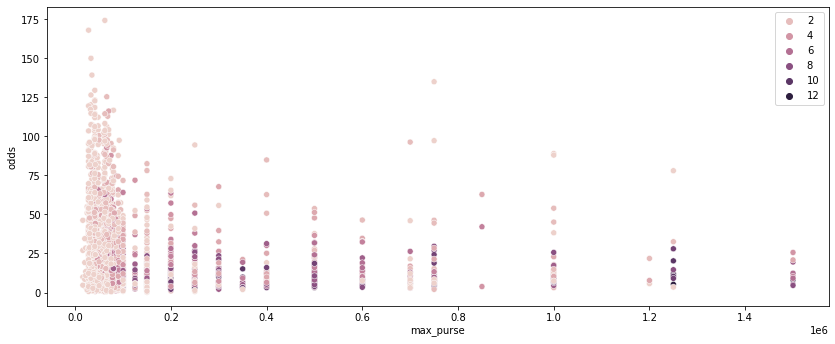

In [19]:
sns.scatterplot(x = 'max_purse',y = 'odds',hue = list(masterdata.nrace_number),data = masterdata,legend = True)

It is quite obvious, that with the increase of number of races, the upper threshold of Purse for the Jockey is increasing. 
But it seems that the odds were higher for jockies with lower number of races on record. 

[Figure 3]
> Average Velocity Vs Odds (Level: Jockey -Race Date)

<AxesSubplot:xlabel='median_velocity', ylabel='odds'>

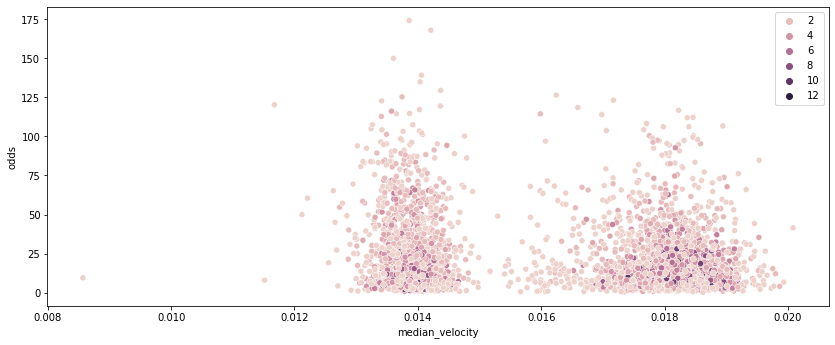

In [20]:
plt.rcParams["figure.figsize"] = [14.00, 5.50]
sns.scatterplot(x = 'median_velocity',y = 'odds',hue = list(masterdata.nrace_number),data = masterdata,legend = True)

Jockies with high average velocity tends to have a greater spread with odds reaching as high as 125, 
where as jockies with an average velocity near the center of the distribution for their average velocities seems to have a peaked values of odds near 175.

[Figure 4]
> Horizantal barplot : Jockies Vs Average Odds

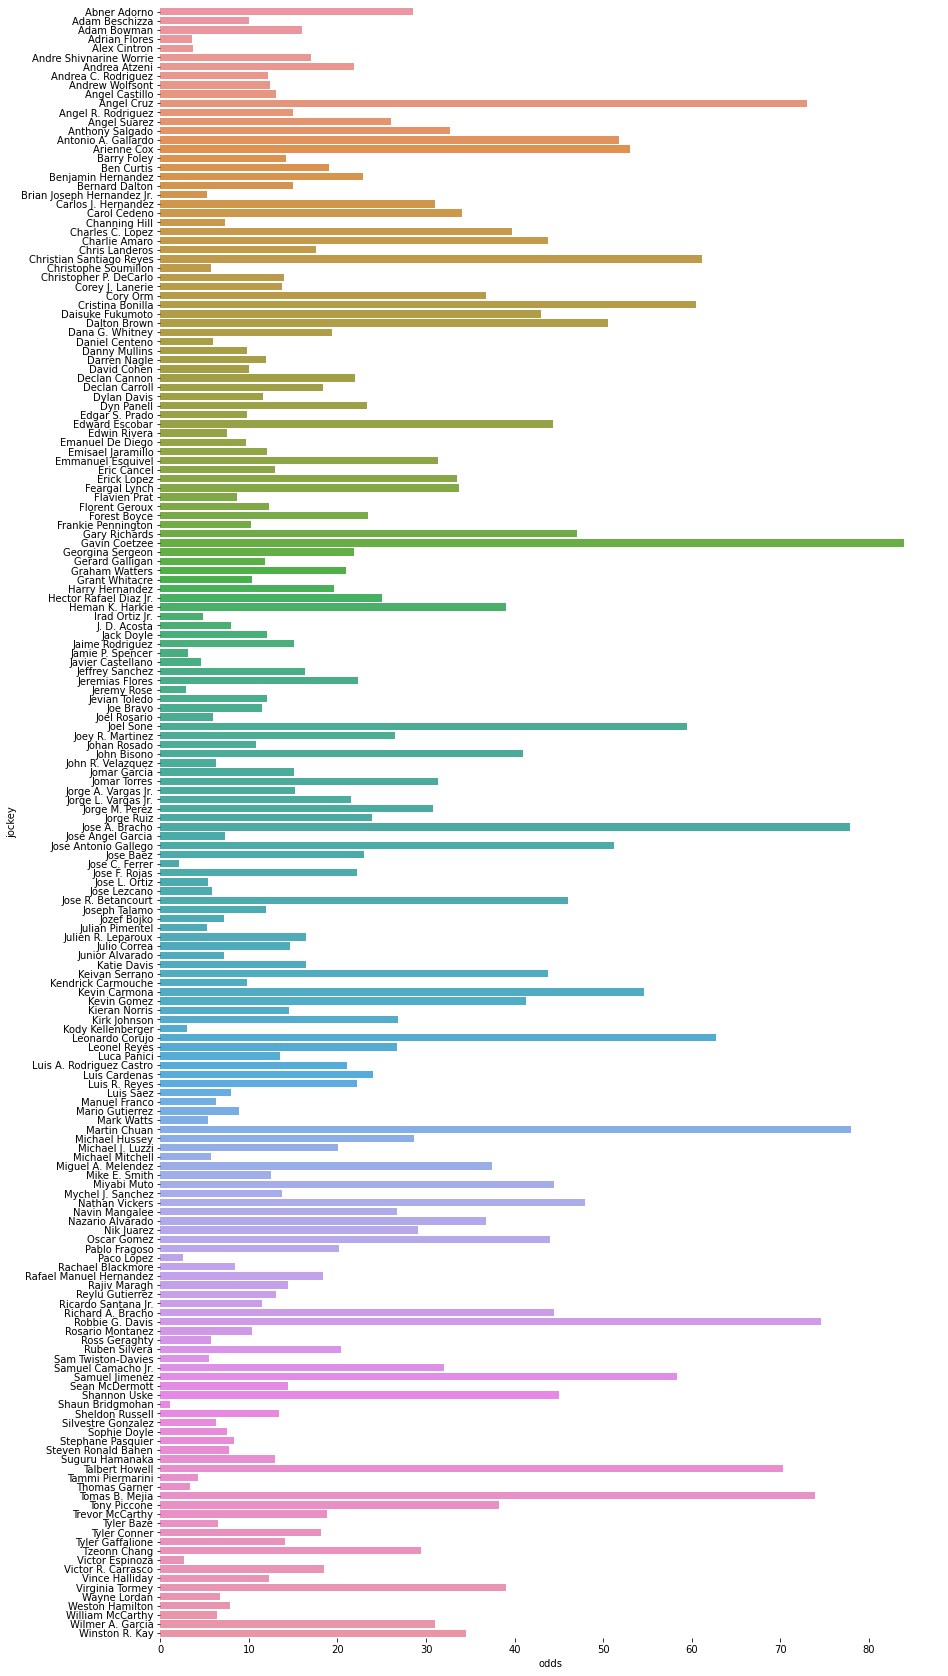

In [26]:
jockey_s = masterdata.groupby(['jockey'])['odds'].median().reset_index()
plt.rcParams["figure.figsize"] = [14.00, 30]
sns.barplot(y = 'jockey',x = 'odds',data = jockey_s,orient = 'h')
sns.despine(left=True, bottom=True)

# Towards ML technique:

[ML Algorithm: DBSCAN]

In [21]:
def compile_NN(data,
               features,
               neighbors):
    
    from sklearn.neighbors import NearestNeighbors
    NN_model = NearestNeighbors(n_neighbors= neighbors,metric = 'minkowski',n_jobs = -1)
    Neighbors = NN_model.fit(masterdata[features])
    distances, indicies = Neighbors.kneighbors(masterdata[features])
    
    distances = np.sort(distances,axis = 0)
    distances = distances[:,1]
    plt.rcParams['figure.figsize'] = (11,5)
    plot = plt.plot(distances)
    
    return plot

In [22]:
feature_list = ['nrace_number', 'nprogram_number',
               'ncourse_type', 'ntrack_condition','min_distance_feet', 'max_distance_feet',
               'nrace_type', 'min_purse', 'max_purse', 'min_weight', 'max_weight',
               'min_velocity', 'Qdot25_velocity', 'Qdot33_velocity', 'median_velocity',
               'Qdot75_velocity', 'Qdot95_velocity', 'odds']

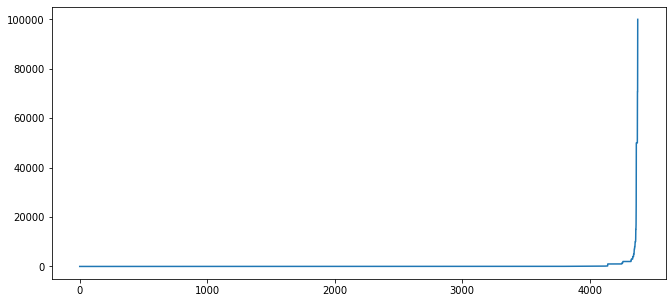

In [23]:
compile_NN(masterdata,
           feature_list,
           neighbors = int(np.floor(np.sqrt(masterdata.shape[0]))))

In [24]:
def apply_dbscan(data,epsilon,min_pts):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import DBSCAN
    
    dbscan = DBSCAN(eps = epsilon,min_samples = min_pts,metric = 'euclidean')
    dbdata = np.array(data[feature_list])
    dbscan.fit(dbdata)
    
    data['dbscan_tag'] = dbscan.labels_
    stripplot = sns.stripplot(x = 'dbscan_tag',y = 'odds',data = data)
    
    return stripplot

<AxesSubplot:xlabel='dbscan_tag', ylabel='odds'>

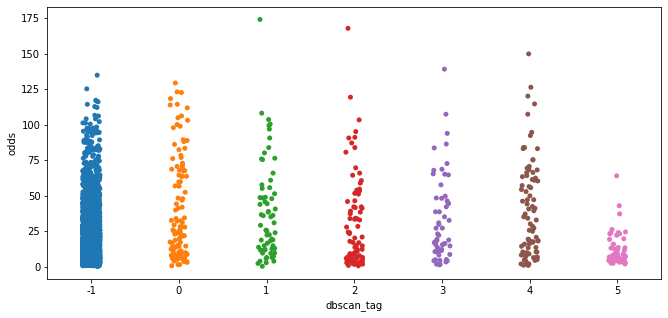

In [23]:
""" hyperparameters :
    Epsilon Distance : 150
    Minimum Points : 2*dim 
"""
apply_dbscan(masterdata,150,2*masterdata.shape[1])

<AxesSubplot:xlabel='dbscan_tag', ylabel='odds'>

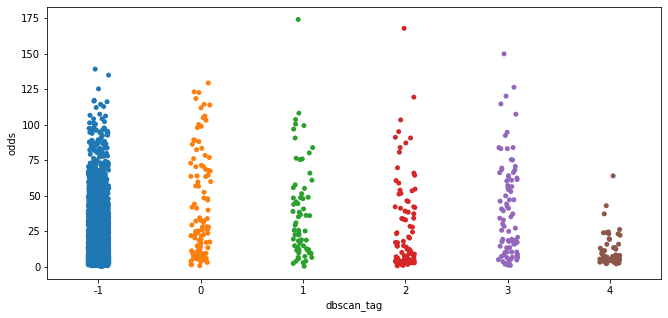

In [24]:
""" hyperparameters :
    Epsilon Distance : 300
    Minimum Points : 2*dim 
"""
apply_dbscan(masterdata,300,2*masterdata.shape[1])

<AxesSubplot:xlabel='dbscan_tag', ylabel='odds'>

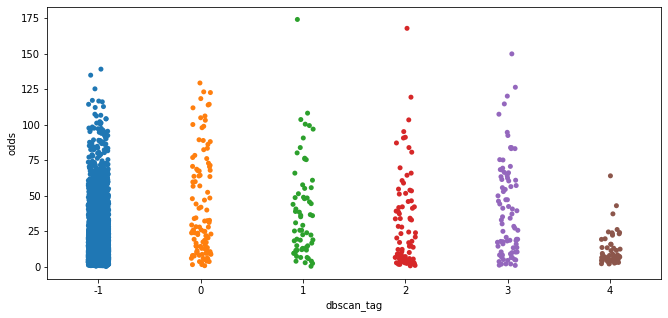

In [25]:
""" hyperparameters :
    Epsilon Distance : 500
    Minimum Points : 2*dim 
"""
apply_dbscan(masterdata,500,2*masterdata.shape[1])

<AxesSubplot:xlabel='dbscan_tag', ylabel='odds'>

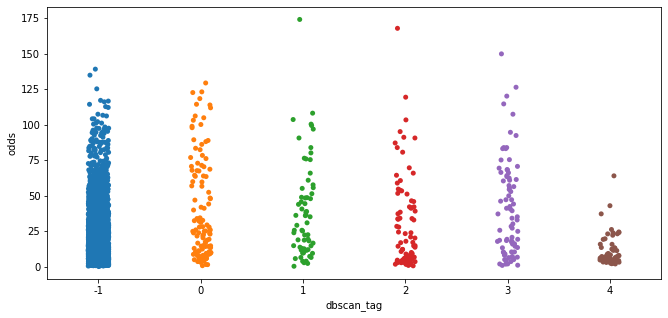

In [26]:
""" hyperparameters :
    Epsilon Distance : 600
    Minimum Points : 2*dim 
"""
apply_dbscan(masterdata,600,2*masterdata.shape[1])

In [25]:
def _dbscan(data,epsilon,min_pts):
    from sklearn.cluster import DBSCAN
    
    dbscan = DBSCAN(eps = epsilon,min_samples = min_pts,metric = 'euclidean')
    dbdata = np.array(data[feature_list])
    dbscan.fit(dbdata)
    
    data['dbscan_tag'] = dbscan.labels_
    
    return data
masterdata = _dbscan(masterdata,600,2*masterdata.shape[1])

In [26]:
masterdata.dbscan_tag.value_counts()

-1    3918
 0     110
 2      86
 4      83
 1      66
 5      58
 3      57
Name: dbscan_tag, dtype: int64

[Check: Dimension of Feature Space]

In [29]:
len(masterdata.columns)

29

----------------------------------------- [Exploring Track Data] -----------------------------------------------------
> Analyzing Track Data [file :nyra_start_table]

In [32]:
trk_data = pd.read_csv('nyra_start_table.csv')
trk_data.head(5)

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds
0,AQU,2019-01-01,1,1,123,Dylan Davis,130
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150


[Quick Missing Value Check]

In [33]:
trk_data.isna().sum()

track_id          0
race_date         0
race_number       0
program_number    0
weight_carried    0
jockey            0
odds              0
dtype: int64

[Insights : Track ID Level]
>>To understand the condition of track based on:
    
    @trk_jockies: number of jockies that ran on these tracks,
    @trk_total_events: number of racedates{events} that took place on given track, 
    @trk_total_races: total number of races that took place on given track, 
    @trk_op_start: the start date of operations(races) 
    @trk_op_last: the last date of operations(races),
    @trk_total_weight: the total weight endured by the given track.

In [56]:
trk_summary = trk_data.groupby('track_id').agg(trk_jockies = pd.NamedAgg('jockey','nunique'),
                                               trk_total_events = pd.NamedAgg('race_date','nunique'),
                                               trk_total_races = pd.NamedAgg('race_number','nunique'),
                                               trk_op_start = pd.NamedAgg('race_date','min'),
                                               trk_op_last = pd.NamedAgg('race_date','max'),
                                               trk_total_weight = pd.NamedAgg('weight_carried','sum')).reset_index()
trk_summary

,track_id,trk_jockies,trk_total_events,trk_total_races,trk_op_start,trk_op_last,trk_total_weight
0,AQU,107,93,11,2019-01-01,2019-12-31,744791
1,BEL,113,85,13,2019-04-26,2019-10-27,666455
2,SAR,91,39,13,2019-07-11,2019-09-02,385326


In [65]:
trk_summary['OPtenure'] = pd.to_datetime(trk_summary['trk_op_last']) - pd.to_datetime(trk_summary['trk_op_start'])
trk_summary

,track_id,trk_jockies,trk_total_events,trk_total_races,trk_op_start,trk_op_last,trk_total_weight,OPtenure
0,AQU,107,93,11,2019-01-01,2019-12-31,744791,364 days
1,BEL,113,85,13,2019-04-26,2019-10-27,666455,184 days
2,SAR,91,39,13,2019-07-11,2019-09-02,385326,53 days


[Additional Inference]
>Based on the above table we can see that track "AQU" has the heighest operational tenure with 93 events, 11 races & 107 jockies running in this track. This track has also endured the maximum load of 744791 units of mass. 
When we compare this track with "BEL" & "SAR" then we discover that "BEL" had more number of jockies running with close enough events with "AQU". 
Track "SAR" has the least number of jockies & events when compared to the other 2 tracks.

[Odds distribution X tracks]
> Let us check the historical distribution for odds of winning across each track. 

In [70]:
trk_data.groupby('track_id')['odds'].describe()

,count,mean,std,min,25%,50%,75%,max
track_id,,,,,,,,
AQU,6191.0,1650.659021,2236.995844,0.0,332.5,740.0,1920.0,19100.0
BEL,5539.0,1365.585846,1793.785789,0.0,315.0,670.0,1620.0,15275.0
SAR,3185.0,1363.623234,1582.836857,25.0,360.0,780.0,1720.0,11675.0


[Insight : Track ID & Race Date Level]

In [58]:
trkdate_summary = trk_data.groupby(['track_id','race_date']).agg(trkdatejockies = pd.NamedAgg('jockey','nunique'),
                                                                 totaltrakdate_weight = pd.NamedAgg('weight_carried','sum'),
                                                                 totaltrakdate_races = pd.NamedAgg('race_number','nunique'),
                                                                 totaltrakdate_programs = pd.NamedAgg('program_number','nunique')).reset_index()
trkdate_summary

,track_id,race_date,trkdatejockies,totaltrakdate_weight,totaltrakdate_races,totaltrakdate_programs
0,AQU,2019-01-01,17,7426,9,12
1,AQU,2019-01-04,19,6070,8,9
2,AQU,2019-01-05,19,7553,9,12
3,AQU,2019-01-06,18,6116,8,9
4,AQU,2019-01-10,17,3550,5,8
...,...,...,...,...,...,...
212,SAR,2019-08-29,23,9961,10,14
213,SAR,2019-08-30,21,10376,11,12
214,SAR,2019-08-31,18,10941,12,11
215,SAR,2019-09-01,19,10876,12,13


[Integrating Data]
> We will now integarate the above to summary into our masterdata to augment them as features corresponding to a jockey on a given date
>> Integration Design:  [masterdata{level: jockey-racedate}] + [trkdate_summary{level: trackid-racedate}] + [trk_summary{level: trackid}]

In [100]:
# level 1: [trkdate_summary{level: trackid-racedate}] + [trk_summary{level: trackid}]
trkdate_ = pd.merge(trkdate_summary,trk_summary,how = 'left',on = 'track_id')
trkdate_

,track_id,race_date,trkdatejockies,totaltrakdate_weight,totaltrakdate_races,totaltrakdate_programs,trk_jockies,trk_total_events,trk_total_races,trk_op_start,trk_op_last,trk_total_weight,OPtenure
0,AQU,2019-01-01,17,7426,9,12,107,93,11,2019-01-01,2019-12-31,744791,364 days
1,AQU,2019-01-04,19,6070,8,9,107,93,11,2019-01-01,2019-12-31,744791,364 days
2,AQU,2019-01-05,19,7553,9,12,107,93,11,2019-01-01,2019-12-31,744791,364 days
3,AQU,2019-01-06,18,6116,8,9,107,93,11,2019-01-01,2019-12-31,744791,364 days
4,AQU,2019-01-10,17,3550,5,8,107,93,11,2019-01-01,2019-12-31,744791,364 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,SAR,2019-08-29,23,9961,10,14,91,39,13,2019-07-11,2019-09-02,385326,53 days
213,SAR,2019-08-30,21,10376,11,12,91,39,13,2019-07-11,2019-09-02,385326,53 days
214,SAR,2019-08-31,18,10941,12,11,91,39,13,2019-07-11,2019-09-02,385326,53 days
215,SAR,2019-09-01,19,10876,12,13,91,39,13,2019-07-11,2019-09-02,385326,53 days


[data: trkdate_, common key : track id + race date]
> Creating a common key to integrate the above data with our masterdata on a Jockey + race date level.

In [104]:
trkdate_['key_track_date'] = trkdate_['track_id'].astype(str) + trkdate_['race_date'].astype(str)
trkdate_['key_track_date']

0      AQU2019-01-01
1      AQU2019-01-04
2      AQU2019-01-05
3      AQU2019-01-06
4      AQU2019-01-10
           ...      
212    SAR2019-08-29
213    SAR2019-08-30
214    SAR2019-08-31
215    SAR2019-09-01
216    SAR2019-09-02
Name: key_track_date, Length: 217, dtype: object

[data : masterdata, common key : track id + race date]
>[Structural Change to column 'track']

In [123]:
for i in list(range(0,masterdata.shape[0])):
        masterdata.iloc[i,2] = masterdata.iloc[i,2][0]

In [125]:
masterdata['key_track_date'] = masterdata['track'] + masterdata['race_date'].astype(str)
masterdata['key_track_date']

0       AQU2019-02-01
1       SAR2019-08-29
2       BEL2019-09-18
3       BEL2019-05-03
4       BEL2019-05-04
            ...      
4373    BEL2019-10-10
4374    BEL2019-10-16
4375    BEL2019-10-19
4376    AQU2019-12-12
4377    AQU2019-01-25
Name: key_track_date, Length: 4378, dtype: object

In [126]:
# level 2: [masterdata{level: jockey-racedate}] + [trkdate_summary{level: trackid-racedate}] + [trk_summary{level: trackid}]
masterdata_ = pd.merge(masterdata,trkdate_[['key_track_date', 'trkdatejockies', 'totaltrakdate_weight',
                                           'totaltrakdate_races', 'totaltrakdate_programs', 'trk_jockies',
                                           'trk_total_events', 'trk_total_races','trk_total_weight', 'OPtenure']],
                       how = 'left',on = ['key_track_date'])

In [129]:
masterdata_

,jockey,race_date,track,nrace_number,nprogram_number,ncourse_type,ntrack_condition,approxsteps_GD,approxsteps_FM,approxsteps_FT,...,key_track_date,trkdatejockies,totaltrakdate_weight,totaltrakdate_races,totaltrakdate_programs,trk_jockies,trk_total_events,trk_total_races,trk_total_weight,OPtenure
0,Abner Adorno,2019-02-01,AQU,1,1,1,1,0,0,296,...,AQU2019-02-01,24,6562,8,11,107,93,11,744791,364 days
1,Abner Adorno,2019-08-29,SAR,1,1,1,1,0,397,0,...,SAR2019-08-29,23,9961,10,14,91,39,13,385326,53 days
2,Abner Adorno,2019-09-18,BEL,1,1,1,1,0,390,0,...,BEL2019-09-18,28,7290,8,11,113,85,13,666455,184 days
3,Adam Beschizza,2019-05-03,BEL,2,2,2,2,0,0,399,...,BEL2019-05-03,15,3969,4,12,113,85,13,666455,184 days
4,Adam Beschizza,2019-05-04,BEL,6,4,3,2,0,0,0,...,BEL2019-05-04,15,11264,12,16,113,85,13,666455,184 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Wilmer A. Garcia,2019-10-10,BEL,1,1,1,1,0,289,0,...,BEL2019-10-10,14,6141,8,12,113,85,13,666455,184 days
4374,Wilmer A. Garcia,2019-10-16,BEL,1,1,1,1,0,0,0,...,BEL2019-10-16,23,6500,8,12,113,85,13,666455,184 days
4375,Wilmer A. Garcia,2019-10-19,BEL,1,1,1,1,0,0,294,...,BEL2019-10-19,18,9854,11,11,113,85,13,666455,184 days
4376,Wilmer A. Garcia,2019-12-12,AQU,1,1,1,1,311,0,0,...,AQU2019-12-12,20,7831,8,13,107,93,11,744791,364 days


In [130]:
masterdata_.columns

Index(['jockey', 'race_date', 'track', 'nrace_number', 'nprogram_number',
       'ncourse_type', 'ntrack_condition', 'approxsteps_GD', 'approxsteps_FM',
       'approxsteps_FT', 'approxsteps_SY', 'approxsteps_MY', 'approxsteps_YL',
       'approxsteps_SF', 'min_distance_feet', 'max_distance_feet',
       'nrace_type', 'min_purse', 'max_purse', 'min_weight', 'max_weight',
       'min_velocity', 'Qdot25_velocity', 'Qdot33_velocity', 'median_velocity',
       'Qdot75_velocity', 'Qdot95_velocity', 'odds', 'dbscan_tag',
       'key_track_date', 'trkdatejockies', 'totaltrakdate_weight',
       'totaltrakdate_races', 'totaltrakdate_programs', 'trk_jockies',
       'trk_total_events', 'trk_total_races', 'trk_total_weight', 'OPtenure'],
      dtype='object')

[ML Algorithm: Random Forest Regression]

In [131]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

baseline_model = RandomForestRegressor(n_estimators = 1000,max_depth = 3,oob_score=True,n_jobs= -1,random_state = True,verbose = 1)
baseline_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': True,
 'verbose': 1,
 'warm_start': False}

{Error Metrics}

In [132]:
def model_evaluation(model,testdata,testlebel):
    
    predictions = model.predict(testdata)
    errors = predictions - testlebel
    
    # MAE
    mae = abs(predictions - testlebel).mean()
    #RMSE
    rmse = np.sqrt((errors**2).mean())
    # MAPE
    mape = ((abs(errors)/testlebel).mean())*100
    #R2
    R2 = np.var(predictions)/np.var(testlebel)
    
    return mae,rmse,R2

[ML Algorithm]
Function to compile Random Forest

In [137]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


def rf_compile(data,test_comp,randomised_cv = False):
    
    track_dummies = pd.get_dummies(data.track.astype(str))
    data = pd.concat([data,track_dummies],axis = 1)
    
    # isolating the response variable:
    response = np.array(data['odds'])
    
    # analytical dataset for random forrest to compile:
    features = data.drop(labels = ['jockey','race_date','track','odds','key_track_date','OPtenure'],axis = 1)
    
    # features to train on:
    feature_list = list(features.columns)
    
    # from pandas frame to numpy array
    features = np.array(features)
    
    train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                                response,
                                                                                test_size = test_comp,
                                                                                random_state = 100)
    
    # compiling the baseline model
    print('creating our baseline model')
    baseline_model = RandomForestRegressor(n_estimators = 1000,
                                           max_depth = 3,
                                           oob_score=False,
                                           n_jobs= -1,
                                           random_state = True,
                                           verbose = 1)
    
    baseline_model.fit(train_features,train_labels)
    
    # optimizing our baseline model by using randomisedCV
    if(randomised_cv == True):
        print('...initiating randomised CV')
        parameter_grid = {'n_estimators': [500,700,900,1000,1500],
                          'max_features': ['auto', 'sqrt'],
                          'max_depth': [3,4,5],
                          'min_samples_split': [3,5,9,10],
                          'min_samples_leaf': [2,3,4,5],
                          'bootstrap': [True]}
        
        model = RandomizedSearchCV(estimator = baseline_model, 
                                   param_distributions = parameter_grid,
                                   n_iter = 100, 
                                   cv = 5, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs = -1)
        model.fit(train_features,train_labels)
        
        
        # Fitting the final model based on the Randomised CV
        RF = RandomForestRegressor(n_estimators = model.best_params_['n_estimators'],
                                   min_samples_split = model.best_params_['min_samples_split'],
                                   min_samples_leaf = model.best_params_['min_samples_leaf'],
                                   max_features = model.best_params_['max_features'],
                                   max_depth = model.best_params_['max_depth'],
                                   bootstrap = model.best_params_['bootstrap'],
                                   random_state = 1)
        RF.fit(test_features,test_labels)

                
        # Test - Accuracy {using RF}
        mae,rmse,R2 = model_evaluation(model,test_features,test_labels)
        
    return RF,mae,rmse,R2

In [138]:
rf_model,mae,rmse,R2 = rf_compile(masterdata_,0.20,True)
print(f"best parameters : {rf_model.get_params()} & [MAE,RMSE,R2] :{mae,rmse,R2}")

creating our baseline model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


...initiating randomised CV
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.7s finished
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been d

best parameters : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False} & [MAE,RMSE,R2] :(12.034418984931216, 17.940631429065597, 0.21059873983963454)


[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1500 out of 1500 | elapsed:    0.2s finished


In [135]:
rf_model.n_features_

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


28

Elapsed time to compute the importances: 12.803 seconds


<AxesSubplot:>

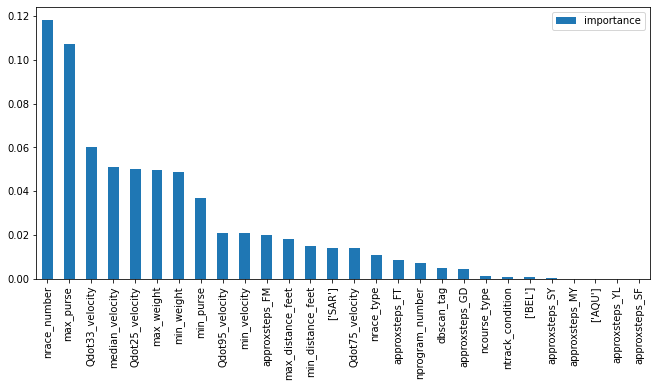

In [35]:
import time
from sklearn.inspection import permutation_importance


track_dummies = pd.get_dummies(masterdata.track.astype(str))
data = pd.concat([masterdata,track_dummies],axis = 1)
response = np.array(data['odds'])
feature_ = data.drop(labels = ['jockey','race_date','track','odds'],axis = 1)
feature_list = list(feature_.columns)
feature_ = np.array(feature_)


train_features, test_features, train_labels, test_labels = train_test_split(feature_,
                                                                            response,
                                                                            test_size = 0.20,
                                                                            random_state = 100)

start_time = time.time()
result = permutation_importance(rf_model,test_features,test_labels,n_repeats = 10,n_jobs = -1,random_state = 999)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(result.importances_mean, index=feature_list)
importances_ = pd.DataFrame({'features':feature_list,'importance':forest_importances})
importances_ = importances_.sort_values('importance',ascending = False)
importances_.plot.bar()

[Variable Importance]
> ['nrace_number',
 'max_purse',
 'Qdot33_velocity',
 'median_velocity',
 'Qdot25_velocity',
 'max_weight',
 'min_weight',
 'min_purse',
 'Qdot95_velocity',
 'min_velocity',
 'approxsteps_FM'] 
>> We can infer from the Variable Importance Plot that the above listed features are contributing in explaining the odds of the Jockey
winning. These are highlighted important from a bagging environment. 

In [36]:
rfdummies = pd.get_dummies(masterdata.track.astype(str))
masterdata = pd.concat([masterdata,rfdummies],axis = 1)
xdata = masterdata.drop(labels = ['jockey','race_date','track','odds'],axis = 1)
xdata = np.array(xdata)
masterdata['rf_prediction'] = rf_model.predict(xdata)

[DBSCAN] 
> Density Based Clustering Application with Noise
>> As we can see that the features in the data has severe non-linear associations with our response variable 'odds', 
hence we must investigate into this by applying a Density based Clustering Algorithm, say DBSCAN to investigate this. 

[Generating top features from the Bagging Environment]

In [37]:
topRF_features =  list(importances_.loc[importances_['importance'] > 0.02].features)
topRF_features

['nrace_number',
 'max_purse',
 'Qdot33_velocity',
 'median_velocity',
 'Qdot25_velocity',
 'max_weight',
 'min_weight',
 'min_purse',
 'Qdot95_velocity',
 'min_velocity',
 'approxsteps_FM']

[ML Algorithm: KNN - Regression]
> We will now carry out a Neighbourhood-based regression model to predict the 'odds' based on the important features 
from the above Random Forest Model

In [38]:
from sklearn.neighbors import KNeighborsRegressor
KNNR = KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='brute',n_jobs=None)
KNNR.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

[KNN- Regression : Model Compilation]

In [40]:
def compile_KNNReg(data,col_names,is_randomCV = False):
    
    from sklearn.neighbors import KNeighborsRegressor
    baselineKNNR = KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='brute',n_jobs=-1)
    
    # train-test split
    from sklearn.model_selection import train_test_split 
    X = data[col_names]
    Y = data['odds']
    train_features, test_features, train_labels, test_labels = train_test_split(X,Y,test_size = 20,random_state = 100)
    
    
    if(is_randomCV == True):
        from sklearn.model_selection import RandomizedSearchCV
        params_dic = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                     'metric': ['minkowski'],
                     'metric_params': [None],
                     'n_jobs': [-1,1],
                     'n_neighbors': list(range(1,int(np.floor(np.sqrt(data.shape[0]))))),
                     'p': list(range(0,data.shape[1])),
                     'weights': ['uniform','distance']}
        opt_model = RandomizedSearchCV(estimator = baselineKNNR,
                                       param_distributions = params_dic,
                                       n_iter = 100,
                                       scoring = 'r2',
                                       n_jobs = -1,
                                       cv = 5,
                                       verbose = 1,
                                       random_state = 45)
        opt_model.fit(train_features,train_labels)
        
        # generate predictions:
        pred_y = opt_model.predict(test_features)
        
        # mape
        mae,rmse,R2 = model_evaluation(opt_model,test_features,test_labels)
        
    return opt_model,mae,rmse,R2

In [41]:
KNNR_model,mae,rmse,R2 = compile_KNNReg(masterdata,topRF_features,True)
print(f"best parameters : {KNNR_model.best_params_} & [MAE,RMSE,R2] :{mae,rmse,R2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best parameters : {'weights': 'uniform', 'p': 5, 'n_neighbors': 54, 'n_jobs': -1, 'metric_params': None, 'metric': 'minkowski', 'algorithm': 'ball_tree'} & [MAE,RMSE,R2] :(10.626829162628214, 13.983517686920555, 0.23515679106036141)


C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py", line 203, in fit
    return self._fit(X, y)
  File "C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\

In [46]:
masterdata['KNNR_prediction'] = KNNR_model.predict(masterdata[topRF_features])

In [65]:
corrRFvsOdds = np.corrcoef(masterdata.rf_prediction,masterdata.odds)[0,1]
corrKNNvsOdds = np.corrcoef(masterdata.KNNR_prediction,masterdata.odds)[0,1]
print(f"correlation coef between Odds & Random Forest Predictions {corrRFvsOdds} + correlation coef between Odds & Knn Predictions {corrKNNvsOdds}")

correlation coef between Odds & Random Forest Predictions 0.49935454629737264 + correlation coef between Odds & Knn Predictions 0.40246871967800424


[ML Algorithm : GradientBoosting Regressor]

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [95]:
def compile_GBR(data,test_comp,col_names,is_randomCV = True):
    
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    
    dbscan_dummies = pd.get_dummies(data.dbscan_tag.astype(str))
    data = pd.concat([data,dbscan_dummies],axis = 1)
    
    X = data[col_names]
    y = data['odds']
    
    xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20)
    
    baseline_model = GradientBoostingRegressor()
    
    if(is_randomCV == True):
        params = {'alpha': [0.7,0.8,0.9],
                 'ccp_alpha': list(range(0,20)),
                 'criterion': ['friedman_mse','squared_error','mse'],
                 'learning_rate': [0.008,0.009,0.01],
                 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                 'max_depth': [3,4,5,6,7],
                 'max_features': list(range(0,masterdata.shape[1]-10)),
                 'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1200],
                 'validation_fraction': [0.1,0.2],
                 'warm_start': [False,True]}
        model = RandomizedSearchCV(estimator = baseline_model,
                                   param_distributions = params,
                                   n_iter = 30,
                                   n_jobs = -1,
                                   cv = 4)
        model.fit(xtrain,ytrain)
        
        
        # Compiling the GBR object form the RCV Optimized Model
        GBR = GradientBoostingRegressor(alpha = model.best_params_['alpha'],
                                        ccp_alpha = model.best_params_['ccp_alpha'],
                                        criterion = model.best_params_['criterion'],
                                        learning_rate = model.best_params_['learning_rate'],
                                        loss = model.best_params_['loss'],
                                        max_depth = model.best_params_['max_depth'],
                                        max_features = model.best_params_['max_features'],
                                        n_estimators = model.best_params_['n_estimators'],
                                        validation_fraction = model.best_params_['validation_fraction'],
                                        warm_start = model.best_params_['warm_start'])
        GBR.fit(xtrain,ytrain)
        
        # {Error Measures:}
        mae,rmse,R2 = model_evaluation(GBR,xtest,ytest)
        
        
    return GBR,mae,rmse,R2
    

In [75]:
topRF_features.append('dbscan_tag')
topRF_features.append('KNNR_prediction')
GBRCols = topRF_features

In [96]:
GBR_model,MAE,RMSE,R2 = compile_GBR(masterdata,0.20,GBRCols,is_randomCV = True)

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensem

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `crite

In [87]:
GBR_model.get_params()

{'alpha': 0.8,
 'ccp_alpha': 0,
 'criterion': 'mse',
 'init': None,
 'learning_rate': 0.009,
 'loss': 'huber',
 'max_depth': 7,
 'max_features': 1,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': True}

12.123694129157009